**Answer 5.1**

In [25]:
#Importing necessary modules
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [5]:
fortis = pd.read_csv("FORTIS.csv")#Importing the stock data

In [13]:
fortis.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,FORTIS,EQ,15-May-2017,208.40,208.40,209.65,204.05,206.75,205.25,205.66,9078354,1.867055e+09,24607,5980115,65.87
1,FORTIS,EQ,16-May-2017,205.25,206.25,209.45,205.45,207.70,207.90,207.86,2146212,4.461109e+08,15071,1127662,52.54
2,FORTIS,EQ,17-May-2017,207.90,208.00,210.80,204.90,205.30,205.90,208.01,3032479,6.307854e+08,21453,1609171,53.06
3,FORTIS,EQ,18-May-2017,205.90,204.00,205.25,195.00,195.80,196.85,200.05,2852401,5.706199e+08,18709,1337328,46.88
4,FORTIS,EQ,19-May-2017,196.85,197.80,204.90,196.45,204.20,203.55,200.95,4144993,8.329173e+08,37949,1424440,34.37


In [10]:
fortis = fortis[fortis["Series"]=="EQ"] # Dropping the rows which don't have Series = EQ 

In [12]:
fortis = fortis.reset_index(drop=True)# Resetting the index of the dataframe

In [15]:
fortis["Day_perc"] = fortis["Close Price"].pct_change()#Calculating percentage change

In [21]:
daily_mean = fortis["Day_perc"].mean()#Calculating mean of pct change

In [22]:
daily_mean

-0.0005793231851192515

In [18]:
daily_stdev = fortis["Day_perc"].std()#Calculating standard deviation of pct change

In [19]:
daily_stdev

0.026536281966059345

In [23]:
annual_mean = daily_mean*252#Calculating annualized daily mean

In [30]:
annual_std = daily_stdev * np.sqrt(252)#Calculating volatility stock

In [31]:
annual_mean

-0.14598944265005137

In [32]:
annual_std

0.421250416814887

In [46]:
print("Volatility is %f" %(annual_std)) #Printing volatility of stock

Volatility is 0.421250


**Answer 5.2** 

In [47]:
infy = pd.read_csv("INFY.csv")# Loading stock num 2

In [48]:
infy = infy[infy["Series"]=="EQ"]

In [56]:
infy["pct"] = infy["Close Price"].pct_change()#Calculating standard deviation of pct change

In [49]:
lt = pd.read_csv("LT.csv")#Loading stock num 3

In [50]:
lt = lt[lt["Series"]=="EQ"]

In [57]:
lt["pct"] = lt["Close Price"].pct_change()#Calculating standard deviation of pct change

In [59]:
lal = pd.read_csv("LALPATHLAB.csv")#Loading stock num 4

In [60]:
lal = lal[lal["Series"]=="EQ"]

In [61]:
lal["pct"] = lal["Close Price"].pct_change()#Calculating standard deviation of pct change

In [62]:
gail = pd.read_csv("GAIL.csv")#Loading stock num 5

In [63]:
gail = gail[gail["Series"]=="EQ"]

In [64]:
gail["pct"]=gail["Close Price"].pct_change()#Calculating standard deviation of pct change

In [65]:
portfolio = pd.DataFrame() # Creating new dataframe 

In [66]:
portfolio["infy"] = infy["pct"]

In [68]:
portfolio["lal"] = lal["pct"]

In [69]:
portfolio["gail"] = gail["pct"]

In [70]:
portfolio["lt"] = lt["pct"]

In [71]:
portfolio["fortis"] = fortis["Day_perc"]

In [81]:
portfolio[:1]=0

In [121]:
portfolio.head()

,infy,lal,gail,lt,fortis
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.003626,0.011492,-0.006280,-0.000976,0.012911
2,-0.002304,0.000823,-0.007535,0.008474,-0.009620
3,0.009393,-0.002139,-0.008695,-0.018713,-0.043953
4,-0.003951,0.000550,-0.009141,0.001132,0.034036


In [84]:
weights = np.asarray([0.2,0.2,0.2,0.2,0.2]) #Assigning weights to the 5 stocks

In [85]:
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [86]:
portfolio_return = portfolio.mean() #Calculating mean of all the stocks

In [87]:
portfolio_return

infy     -0.000094
lal       0.000240
gail     -0.000229
lt       -0.000308
fortis   -0.000594
dtype: float64

In [88]:
cov_matrix = portfolio.cov() # Calculating the covariance matrix of the portfolio dataframe

In [89]:
cov_matrix

,infy,lal,gail,lt,fortis
infy,0.000695,0.000024,0.000034,0.000014,0.000053
lal,0.000024,0.000276,0.000025,0.000024,0.000027
gail,0.000034,0.000025,0.000455,0.000054,0.000071
lt,0.000014,0.000024,0.000054,0.000393,0.000045
fortis,0.000053,0.000027,0.000071,0.000045,0.000706


In [90]:
port_annual_ret = np.sum(portfolio_return*weights)*252 #Calculating annualized return of portfolio

In [91]:
port_annual_ret

-0.04963873621430992

In [92]:
port_volatility = np.sqrt(np.dot(weights.T,np.dot(cov_matrix,weights)))*np.sqrt(252)#Calculating volatility of portfolio

In [93]:
port_volatility

0.18139432976312583

**Answer 5.3**

In [104]:
total_portfolio = 30000 # Total number of portfolio weights

In [105]:
results = np.zeros((3,total_portfolio))# Array to store results

In [106]:
results

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [107]:
for i in range(total_portfolio):
    #select random weights for portfolio holdings
    weights = np.random.random(5)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_returns = np.sum(portfolio_return * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_returns
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) 
    results[2,i] = results[0,i] / results[1,i]


In [108]:
results

array([[-0.07148243, -0.02689284, -0.03222261, ..., -0.03876195,
        -0.07715258, -0.05919121],
       [ 0.21167021,  0.20184894,  0.18826619, ...,  0.1909915 ,
         0.20170332,  0.18550083],
       [-0.33770662, -0.13323251, -0.17115454, ..., -0.2029512 ,
        -0.38250526, -0.31908869]])

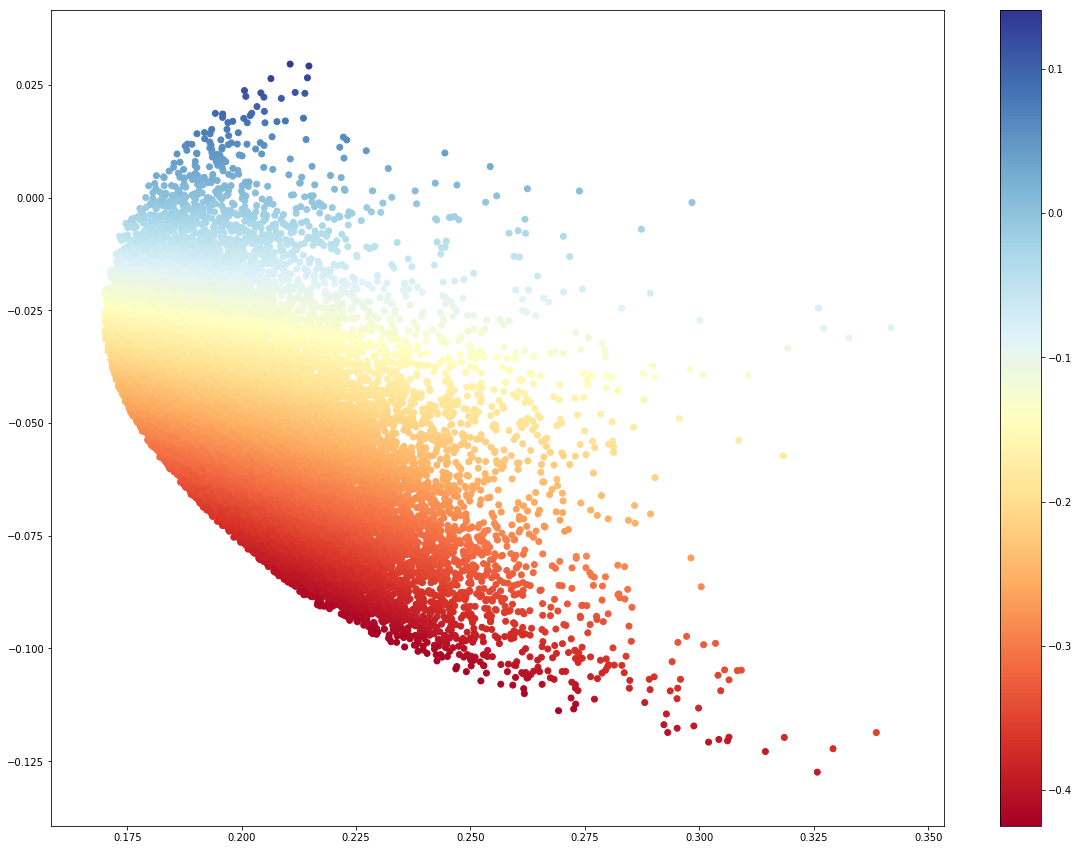

In [115]:
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])

#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize=(20,15))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()

**Answer 5.4**

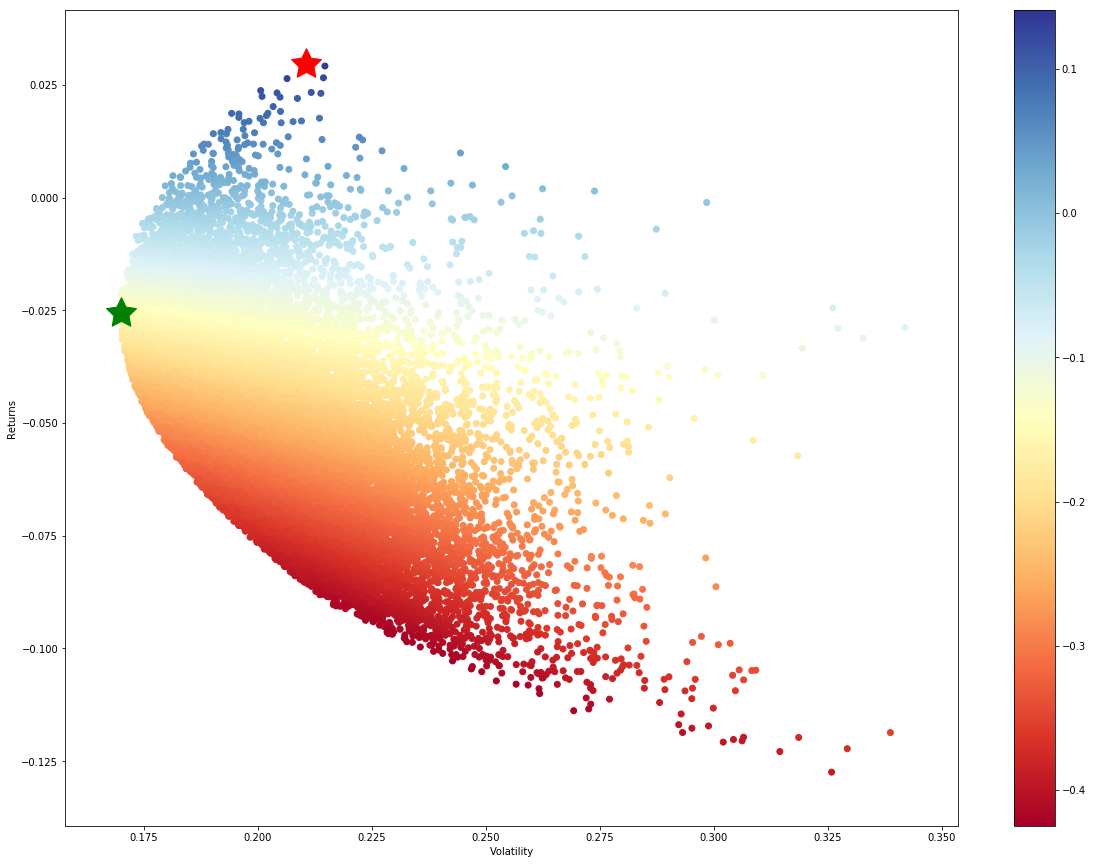

In [119]:
#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize=(20,15))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()
plt.xlabel("Volatility")
plt.ylabel("Returns")
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#plot red star to highlight position of highest sharpe ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)